In [2]:
# https://github.com/youngmihuang/lyrics_application
# https://pypi.org/project/GoogleNews/

from GoogleNews import GoogleNews

import requests 
from bs4 import BeautifulSoup
import pandas as pd

googlenews = GoogleNews()

googlenews.setlang('cn')
googlenews.setperiod('d')
googlenews.setencode('utf-8')
googlenews.clear()


x = input("請輸入要搜尋的關鍵字，將為你搜集相關字詞內容:")
googlenews.search(x)

alldata = googlenews.result()
result = googlenews.gettext()
links = googlenews.get__links()
# print(type(result))
# print(len(result))
# print(alldata)


print()

for n in range(len(result)):
#     print(n+1)
    print(result[n])
    print(links[n])
   

df = pd.DataFrame(
{
    '標題': result,
    '連結': links
})
 
df


請輸入要搜尋的關鍵字，將為你搜集相關字詞內容:疫苗

流感疫苗增1死老婦心肺衰竭亡不敢打賽諾菲？幼兒接種率低落 ...
https://tw.appledaily.com/life/20201103/XFYTVH4RUNB37JVXFERQHMCVF4/
七旬婦接種流感疫苗後睡夢中過世 疾管署：與疫苗無關
https://udn.com/news/story/121728/4985180
流感疫苗又出事？婦人打完6天後死亡！莊人祥親曝真相| 生活
https://newtalk.tw/news/view/2020-11-03/488488
台灣東洋代理新冠疫苗破局 指揮中心透露談判缺兩文件
https://udn.com/news/story/120940/4985921
東洋代理武漢肺炎疫苗破局 數量價格無法達共識
https://www.cna.com.tw/news/firstnews/202011035008.aspx
價格、數量談不攏 台灣東洋代理新冠疫苗明年首季來不了
https://udn.com/news/story/120940/4985905
增1例接種疫苗後死亡個案 莊人祥：初判與疫苗無關
https://tw.news.yahoo.com/%E5%A2%9E1%E4%BE%8B%E6%8E%A5%E7%A8%AE%E7%96%AB%E8%8B%97%E5%BE%8C%E6%AD%BB%E4%BA%A1%E5%80%8B%E6%A1%88-%E8%8E%8A%E4%BA%BA%E7%A5%A5-%E5%88%9D%E5%88%A4%E8%88%87%E7%96%AB%E8%8B%97%E7%84%A1%E9%97%9C-062500542.html
基隆婦打流感疫苗後不適住院 洗腎3次病情好轉
https://www.cna.com.tw/news/ahel/202011030225.aspx
破局！授權條件未談攏 德國BNT武肺疫苗不賣台灣了
https://ec.ltn.com.tw/article/breakingnews/3340715
幼兒流感疫苗接種率僅39% 較往年低！醫師：幼兒最常併發 ...
https://heho.com.tw/archives/145614


,標題,連結
0,流感疫苗增1死老婦心肺衰竭亡不敢打賽諾菲？幼兒接種率低落 ...,https://tw.appledaily.com/life/20201103/XFYTVH...
1,七旬婦接種流感疫苗後睡夢中過世 疾管署：與疫苗無關,https://udn.com/news/story/121728/4985180
2,流感疫苗又出事？婦人打完6天後死亡！莊人祥親曝真相| 生活,https://newtalk.tw/news/view/2020-11-03/488488
3,台灣東洋代理新冠疫苗破局 指揮中心透露談判缺兩文件,https://udn.com/news/story/120940/4985921
4,東洋代理武漢肺炎疫苗破局 數量價格無法達共識,https://www.cna.com.tw/news/firstnews/20201103...
5,價格、數量談不攏 台灣東洋代理新冠疫苗明年首季來不了,https://udn.com/news/story/120940/4985905
6,增1例接種疫苗後死亡個案 莊人祥：初判與疫苗無關,https://tw.news.yahoo.com/%E5%A2%9E1%E4%BE%8B%...
7,基隆婦打流感疫苗後不適住院 洗腎3次病情好轉,https://www.cna.com.tw/news/ahel/202011030225....
8,破局！授權條件未談攏 德國BNT武肺疫苗不賣台灣了,https://ec.ltn.com.tw/article/breakingnews/334...
9,幼兒流感疫苗接種率僅39% 較往年低！醫師：幼兒最常併發 ...,https://heho.com.tw/archives/145614


In [3]:

url = df['連結'][0]
print(url)


user_agent = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36'}


r = requests.get(url, headers=user_agent)
r.encoding = "utf-8"
web_content = r.text
soup = BeautifulSoup(web_content,'html')


articleContent = soup.find_all('p')
# articleContent

article = []
for p in articleContent:
    article.append(p.text)


articleAll = '\n'.join(article)
# print(articleAll)

# 分段用

https://tw.appledaily.com/life/20201103/XFYTVH4RUNB37JVXFERQHMCVF4/


In [4]:

import jieba
jieba.load_userdict('dict.txt.big.txt')

d = articleAll.replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','')
# print(d)

jieba.setLogLevel(20)

# Sentence = jieba.cut(d, cut_all=True)
# print('全模式'+": "  + "/ ".join(Sentence) + '\n')   
 
# Sentence = jieba.cut(d, cut_all=False)
# print('精確模式'+": " + "/ ".join(Sentence)+ '\n')  
 
# Sentence = jieba.cut(d)  
# print('Default為精確模式'+": " + "/ ".join(Sentence)+ '\n')
 
Sentence = jieba.cut_for_search(d)  
print('搜索引擎模式'+": " + "/ ".join(Sentence)+ '\n')

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/2p/qz_90rqs1fx0_vgnt2xgf6yw0000gn/T/jieba.cache
Loading model cost 1.718 seconds.
Prefix dict has been built succesfully.


搜索引擎模式: 中央/ 流行/ 疫情/ 指揮/ 中心/ 發言/ 發言人/ 莊人祥/ 今/ 指出/ 流感/ 疫苗/ 不良/ 反應/ 統計/ 到/ 昨天/ 共有/ 238/ 件/ 通報/ 其/ 中/ 嚴重/ 不良/ 反應/ 67/ 件非/ 嚴重/ 不良/ 反應/ 171/ 件/ 另外/ 新增/ 1/ 例/ 死亡/ 為/ 一/ 名/ 70/ 多/ 歲/ 女性/ 原本/ 就/ 有/ 慢性/ 腎臟/ 腎臟病/ 糖尿/ 糖尿病/ 心血/ 血管/ 心血管/ 疾病/ 曾/ 裝/ 心臟/ 支架/ 10/ 月/ 19/ 日/ 施打/ 後/ 10/ 月/ 25/ 日/ 在/ 家/ 睡夢/ 中/ 過世/ 死亡/ 診斷/ 診斷為/ 心肺/ 衰竭/ 專家/ 初步/ 研判/ 與/ 心血/ 血管/ 心血管/ 疾病/ 比較/ 相關/ 
/ 相關/ 新聞/ 打/ 公費/ 流感/ 疫苗/ 2/ 例/ 疑似/ GBS/ 患者/ 　/ 疾管/ 疾管署/ 1/ 人/ 已/ 提/ 受害/ 申請/ 
/ 衛福/ 福部/ 衛福部/ 疾管/ 疾管署/ 今/ (/ 3/ )/ 日/ 表示/ 今/ (/ 109/ )/ 年度/ 公費/ 流感/ 疫苗/ 截至/ 11/ 月/ 2/ 日/ 整體/ 疫苗/ 使用/ 使用率/ 達/ 78.6%/ 以上/ 剩餘/ 剩餘量/ 約/ 129/ 萬劑/ 扣除/ 學生/ 校園/ 集中/ 接種/ 所/ 需/ 疫苗/ 後/ 剩餘/ 不/ 到/ 50/ 萬劑/ 惟/ 學齡/ 幼兒/ 流感/ 疫苗/ 接種/ 接種率/ 約/ 39.9%/ 較/ 往年/ 為低/ 尤其/ 未曾/ 接種/ 者/ 第/ 一劑/ 接種/ 接種率/ 僅/ 17.4%/ 籲請/ 家長/ 應/ 儘速/ 攜帶/ 家/ 中/ 嬰幼/ 幼兒/ 嬰幼兒/ 完成/ 接種/ 以/ 保護/ 嬰幼/ 幼兒/ 嬰幼兒/ 健康/ ；/ 另/ 未滿/ 9/ 歲/ 初次/ 接種/ 的/ 幼兒/ 請/ 記得/ 相隔/ 4/ 週/ 以上/ 接種/ 第/ 2/ 劑以/ 獲得/ 完整/ 保護/ 保護力/ 
/ 今年/ 公費/ 疫苗/ 以/ 不同/ 年齡/ 分成/ 兩/ 個/ 品牌/ 6/ 個/ 月至/ 3/ 歲/ 以下/ 賽諾菲/ 巴斯/ 巴斯德/ 的/ 疫苗/ ；/ 3/ 歲/ 以上/ 國光/ 疫苗/ 為主/ 部/ 分為/ 東洋/ 賽諾菲/ 疫苗/ 
/ 疾病

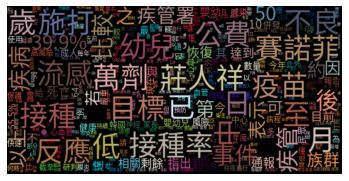

<Figure size 8000x4000 with 0 Axes>

In [5]:
import numpy as np

from PIL import Image

import matplotlib.pyplot as plt

from collections import Counter

from wordcloud import WordCloud, ImageColorGenerator

from scipy.ndimage import gaussian_gradient_magnitude



with open('stopword.txt','r',encoding="utf-8") as f:
    stops = f.read().split('\n')
    

Sentence = jieba.cut_for_search(d)    


terms = {}
for sentence in Sentence :
    if sentence in stops:
        continue
    
    if sentence in terms:
        terms[sentence] += 1
    else:
        terms[sentence] = 1  
        
        
# dicition = Counter(terms)
# print(Counter(terms))








        
# generate_from_text()方法會採納stopwords參數 也可使用

# https://coolors.co/palettes/popular





icon = "color"
icon_path = "%s.png" % icon


mask_color = np.array(Image.open(icon_path))
mask_color = mask_color[::3, ::3]
mask_image = mask_color.copy()
mask_image[mask_image.sum(axis=2) == 0] = 255


edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i]/255., 2) for i in range(3)], axis=0)
mask_image[edges > .08] = 255






wc = WordCloud(font_path="/Users/larry/Library/Fonts/SourceHanSansTW-Regular.otf", 
               mask = mask_color,
               max_font_size=45, 
               max_words = 2000 ,        
               stopwords= stops,
                margin=1,
              relative_scaling=0)     

wc.generate_from_frequencies(terms)
 


image_colors = ImageColorGenerator(mask_color)
wc.recolor(color_func=image_colors)


# 視覺化

plt.imshow(wc , interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(20,10),dpi= 400)
plt.show()

# plt.savefig("asdfghjkl.png")
wc.to_file("img/demo05.png")


In [6]:

newsDf = pd.DataFrame.from_dict(terms, orient='index', columns = ['詞頻'])
newsDf.sort_values(by= ['詞頻'], ascending= False)

,詞頻
疫苗,31
接種,28
幼兒,21
流感,21
\n,15
...,...
系統,1
容易,1
更,1
肺炎,1
